In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Informacion
**Clase:** Redes Neuronales Artificiales

**Nombre:** Alejandro Duque

**Fecha:** 01/11/2021

# 
Una imagen en color en RGB tiene tres matrices que le representan en tres canales RGB. Programe una función que reciba una imagen en color y una ventana y que devuelva la convolución de cada canal en un tensor, con y sin padding.

In [384]:
# Calcula el producto interior entre matrices A y V del mismo tamaño
# Duvuelve como resultado un escalar p
def prodInterior(A, V):
    return(np.sum(A*V))

# Ejecuta la convolucion entre una matriz A y una ventana V
# Devuelve una matriz de interpretacion C
def conv(A, V):
    # Longitud de la ventana
    l = np.shape(V)[0]
    # Filas y Columnas de A
    m,n = np.shape(A)
    # Matriz de interpretacion
    C = np.zeros((m-l+1, n-l+1))
    # Matriz auxiliar
    M = np.zeros(np.shape(V))
    # Distancia del centro de la ventada a cada lado
    d = int((l-1)/2)
    # Ciclo de productos interiores
    for i in range(d, m-d):
        for j in range(d, n-d):
            # Extraigo la submatriz de A
            M = A[i-d:i+d+1, j-d:j+d+1]
            # Calculo el producto interior
            C[i-d,j-d] = prodInterior(M,V)
    
    return(C)

# Ejecuta la convolucion entre un tensor A de 3 canales y una ventana V
# Devuelve un tensor C con la interpretacion de cada canal
def convRGB(A,V):
    # Longitud de la ventana
    l = np.shape(V)[0]
    # Filas y Columnas de A
    m = np.shape(A)[0]
    n = np.shape(A)[1]
    # Matriz de interpretacion
    C = np.zeros((m-l+1, n-l+1, 3))        
    # Calculo la convolucion para cada canal
    for canal in range(3):   
        C[:,:,canal] = conv(A[:,:,canal], V)
    return(C)

# Ejecuta la convolicion entre una imagen RGB de 3 canales (A) y una ventana V
# Recibe un argumento booleano que pregunta por padding
# Devuelve un tensor C de la interpretacion de cada canal con o sin padding
def convolucionRGB(A, V, padding=True):
    if padding:
        l = np.shape(V)[0]
        m = np.shape(A)[0]
        n = np.shape(A)[1]
        A1 = np.zeros((m+l-1, n+l-1, 3))
        d = int((l-1)/2)
        A1[d:m+d, d:n+d, :] = A
        C = convRGB(A1, V)
    else:
        C = convRGB(A,V)
    return(C)

In [385]:
# Pruebo que funcione
# A = np.ones((4,6,3))
# V = np.ones((3,3))
# convolucionRGB(A, V, padding=True)

# 
Diremos que tenemos un kernel finito de ventanas de profundidad n si es que existen n ventanas del mismo tamaño para convolución. Programe una función que inicie un kernel de profundidad n y tamaño k (matrices k × k). Programe dos esquemas, uno en el que inicie aleatoriamente el kernel con una distribución normal estándar y en otro que el usuario pueda proponer manualmente las ventanas.

In [386]:
# Inicializa un kernel de profundidad n y tamaño k
# con valores de una distribución normal estándar
def randomKernel(n, k):
    Kernel = np.random.normal(0,1,(n,k,k))
    return(Kernel)
    
# Inicializa un kernel de profundidad n y tamaño k
# con valores de las ventanas entregadas por el usuario
def initKernel(n, k):
    Kernel = np.zeros((n,k,k))
    print('Ingrese los valores de cada ventana del kernel')
    for ventana in range(n):
        print(f'Ventana numero {ventana}')
        for i in range(k):
            for j in range(k):
                Kernel[ventana,i,j] = input(f'Valor ({i},{j}) = ')
        print()

    return(Kernel)

#
La base de datos cifar-10 (https://www.kaggle.com/c/cifar-10/data) reune imágenes en color de 10 clases, baje los datos de la base y con una muestra pequeña de imágenes haga pruebas con las funciones programadas anteriormente. Observe los resultados, coméntelos.

## Test de la funcion convolucionRGB

In [387]:
# Primero creo una ventana para hacer un blur
V = np.ones((5,5))/25

### Con Padding

In [388]:
# Cargo la imagen de un carro
carro = plt.imread('cifar-10/train/100.png')
# Tamaño de la imagen antes de la convolucion
np.shape(carro)

(32, 32, 3)

In [389]:
# Pruebo la convolucion con padding haciendo un blur
carroConv = convolucionRGB(carro,V)
# Tamaño luego de la convolucion con padding
np.shape(carroConv)

(32, 32, 3)

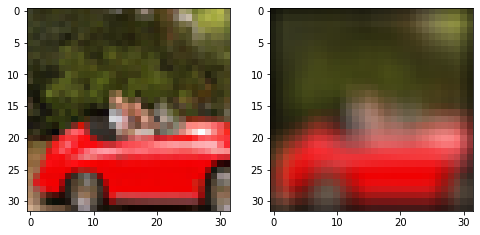

In [390]:
# Grafico la imagen original junto con el resultado de la convolución
plt.subplots(figsize=(8,8))
plt.subplot(1,2,1)
plt.imshow(carro)
plt.subplot(1,2,2)
plt.imshow(carroConv)

Lo que se observa es que después de la convolución el tensor de interpretación preserva el tamaño original de la imagen. Adicionalmente, en la convolucion que aplica padding los pixeles del borde se promedian con varios ceros; el efecto que tiene esto es que la imagen resultante de la convolución tiene un borde más oscuro (con valores más cercanos al 0).

### Sin Padding

In [391]:
# Cargo la imagen de un gato
gato = plt.imread('cifar-10/train/10071.png')
# Tamaño de la imagen antes de la convolucion
np.shape(gato)

(32, 32, 3)

In [392]:
# Pruebo la convolucion sin padding haciendo un blur
gatoConv = convolucionRGB(gato,V,padding=False)
# Tamaño luego de la convolucion con padding
np.shape(gatoConv)

(28, 28, 3)

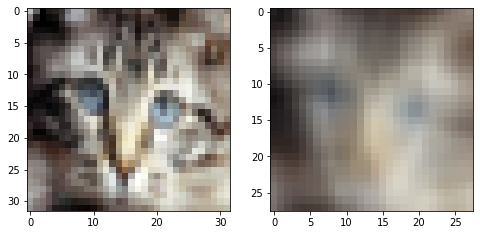

In [393]:
# Grafico la imagen original junto con el resultado de la convolución
plt.subplots(figsize=(8,8))
plt.subplot(1,2,1)
plt.imshow(gato)
plt.subplot(1,2,2)
plt.imshow(gatoConv)

Cuando se hace la convolucion sin padding, la imagen se vuelve más pequeña y parte de la información de los bordes se pierde.

## Test de la creacion de kernels

### Kernel aleatorio

In [394]:
# Funcion auxiliar que tranforma un tensor de interpretacion en una imagen que se puede plotear
def showImg(Img, color=True):
    # Paso los valores negativos a 0
    Img[Img<0] = 0
    # Normalizo los valores para que queden en el rango [0,1]
    Img = Img/np.max(Img, axis = (0,1)) 
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if(color):
        plt.imshow(Img)
    else:
        plt.imshow(Img, cmap='gray')

In [395]:
# Genero un kernel aleatorio con profundidad 6 y tamaño 3
KernelRand = randomKernel(9,3)

/tmp/ipykernel_4186/3401713363.py:6: RuntimeWarning: invalid value encountered in true_divide
  Img = Img/np.max(Img, axis = (0,1))


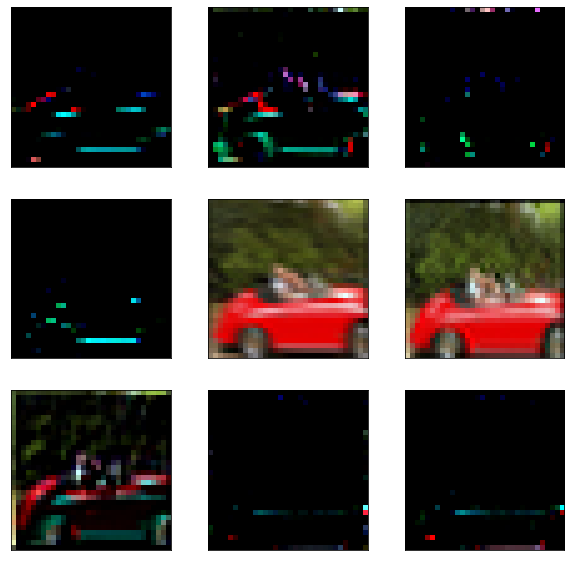

In [396]:
# Convoluciono la foto del carro con cada ventana del kernel
plt.subplots(figsize=(10,10))
for i in range(np.shape(KernelRand)[0]):
    VTemp = KernelRand[i]
    fotoConv = convolucionRGB(carro, VTemp)
    # Grafico los resultados
    plt.subplot(3,3,i+1)
    showImg(fotoConv)

El kernel inicializado a partir de la distribucion normal luego de la convolución genera matrices de interpretación con valores que exceden el rango de colores permitidos. Por esto, para poder mostrar imágenes lo que hago es pasar todos los valores negativos a 0 y normalizar los valores de cada canal. 

Pese a que se usa valores aleatorios del kernel, ya se empieza a apreciar cómo ciertos patrones emergen a patir de la convolución. Las ventanas eventualmente mejorarán su capacidad de identificar patrones de cada clase de imágenes una vez que se acople la capa convolucional a una capa neuronal.

### Kernel del usuario

In [397]:
# Pruebo un kernel de profundidad 2 y tamaño 3 con entradas del usuario
KernelInit = initKernel(2,3)

Ingrese los valores de cada ventana del kernel
Ventana numero 0


Valor (0,0) =  -1
Valor (0,1) =  2
Valor (0,2) =  -1
Valor (1,0) =  -1
Valor (1,1) =  2
Valor (1,2) =  -1
Valor (2,0) =  -1
Valor (2,1) =  2
Valor (2,2) =  -1



Ventana numero 1


Valor (0,0) =  -1
Valor (0,1) =  -1
Valor (0,2) =  -1
Valor (1,0) =  2
Valor (1,1) =  2
Valor (1,2) =  2
Valor (2,0) =  -1
Valor (2,1) =  -1
Valor (2,2) =  -1


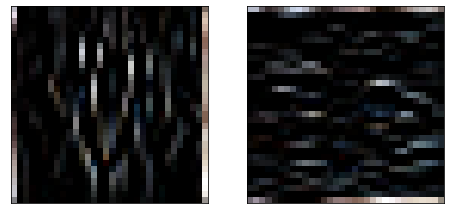

In [398]:
# Convoluciono la foto del gato con cada ventana del kernel
plt.subplots(figsize=(12,12))
for i in range(np.shape(KernelInit)[0]):
    VTemp = KernelInit[i]
    fotoConv = convolucionRGB(gato, VTemp)
    plt.subplot(2,3,i+1)
    showImg(fotoConv)

Las ventanas del kernel inicializadas manualmente fueron escogidas de modo que la convolución pueda identificar bordes verticales y horizontales dentro de la imagen. Esto se logró al colocar valores positivos dentro de la recta vertical y horizontal que pasa por el centro de la ventan, y llenando el resto con valores negativos.

#
Programe una función que sea capaz de recibir un tensor de imágenes en color y sea capaz de devolver un tensor de convoluciones con un kernel de profundidad n y tamaño k (matrices k × k).

In [399]:
# Recibe un Tensor T de imagenes RGB y un kernel K
# Devuelve un Tensor C de convoluciones (usando padding)
def convolucionTensor(T, K):
    # Numero de imagenes
    numImg = np.shape(T)[0]
    # Tamaño de las imagenes
    m = np.shape(T)[1]
    n = np.shape(T)[2]
    # Numero de ventanas
    numV = np.shape(K)[0]
    
    # Inicializo el tensor C 
    C = np.zeros((numImg, numV, m, n, 3))
    # Para cada imagen en el tensor
    for I in range(numImg):
        # Aplico cada uno de los filtros (ventanas) en el kernel
        for V in range(numV):
            C[I, V, :, :, :] = convolucionRGB(T[I], K[V])
    return(C)

#
Pruebe su función haciendo un tensor con las imágenes de cifar-10, y un kernel aleatorio, muestre algunos resultados de forma aleatoria.

## Cargo los datos

In [400]:
# Cargo las imagenes de cifar-10 train y las coloco en un tensor
# total imagenes: 50000
numImg = 50000
Tensor = np.zeros((numImg,32,32,3))
for i in range(1,numImg+1):
    img = plt.imread(f'cifar-10/train/{i}.png')
    Tensor[i-1,:,:,:] = img

## Imagenes antes de la convolución

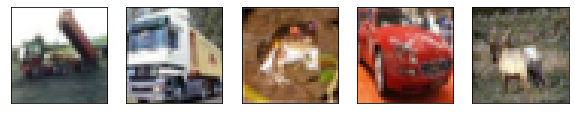

In [401]:
# Selecciono una muestra pequeña de 5 imágenes aleatorias
indRand = np.arange(0, numImg, dtype=int)
indRand = np.random.permutation(ind)[0:5]
TensorMuestra = Tensor[indRand]
# Grafico la muestra de imágenes antes de la convolución
plt.subplots(figsize=(10,10))
for i in range(5):
    # Grafico los resultados
    plt.subplot(1,5,i+1)
    showImg(TensorMuestra[i])

## Imagenes después de la convolución

In [402]:
# Genero un kernel aleatorio de profundidad 4 y tamaño 3
Kernel = randomKernel(4,3)
# Realizo la convolución con las imágenes de muestra
TensorConv = convolucionTensor(TensorMuestra, Kernel)

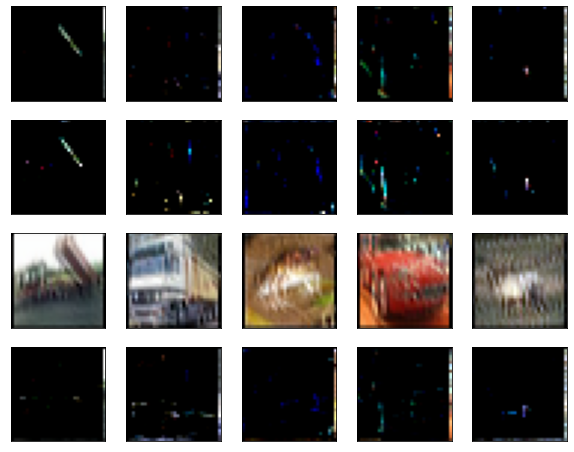

In [403]:
# Muestro la convolucion de las 5 imágenes con cada uno de los 4 filtros
plt.subplots(figsize=(10,8))
ind = 0
for V in range(4):
    for I in range(5):
        ind += 1
        plt.subplot(4,5,ind)
        showImg(TensorConv[I][V])


#
Convierta todas las imágenes a escala de grises y programe una red neuronal usando softmax, haga todas las tansformaciones necesarias para poder utilizar el modelo. Comente los resultados de la clasificación: tiempo, tamaños de batch, épocas, porcentajes de clasificación correctas, etc. Solo en escala de grises. Note que en este ejercicio no estamos utilizando convoluciones

## Red Neuronal con softmax

In [404]:
# Z es el vector <x_1,...,x_n>
def msoft(Z):
    ExpZ = np.exp(Z)
    P = ExpZ / np.sum(ExpZ, axis=0)
    return P


# Recibe la matriz P de probabilidades de output que genera la red
# y la matriz Y de labels conocidas
def entropiaCruzada(P, Y):
    Li = np.sum(np.transpose(Y) * np.log(P), axis=0)
    Ep = -np.average(Li)
    return Ep


# Recibe el tensor de estimulos X, la matriz de labels que conocemos Y
# y las probabilidades de output que genera la red en P
def mgrad(X, Y, P):
    # Calculo las derivadas con respecto a todos los pesos
    # dLdZ es p - 1 cuando el individuo pertenece a la clase
    # dLdZ es p - 0 cuando el individuo no pertenece a la clase
    # Restar a P la transpuesta de Y cumple justo ese proposito
    dLdZ = P - np.transpose(Y)
    dZdW = X
    # Aplico la regla de la cadena
    dLdW = np.matmul(dLdZ, dZdW)
    return dLdW  


# Ajusta los parametros de la red mediante descenso de gradiente
# Recibe el tensor de estimulos, la matriz Y de labels y el numero de pesos
def redn(X, Y, numParam, sizeBunch = 50, numEpoch = 50, step = 0.01, standarize = False):
    # Genero pesos aleatorios
    W = np.random.normal(size = numParam)/50
    # Genero la particion que usaré para toda la búsqueda
    Partition = particionar(len(Y), sizeBunch)
    # Inicializo la perdida
    Loss = []
    # Ciclo de busqueda
    for i in range(numEpoch) :
        # Realizo un cubrimiento de la particion (Epoch)
        for bunch in Partition:
            # Capacidad interpretacion
            Z = np.matmul(W, np.transpose(X))
            # Estandarizo de ser necesario para evitar overflows
            if(standarize):
                Z = (Z - np.mean(Z))/ np.std(Z) * 3
            # Probabilidades obtenidas en softmax
            P = msoft(Z)
            # Gradiente
            grad = mgrad(X[bunch, :], Y[bunch, :], P[:, bunch])
            # Actualizo pesos
            W = W - step *  grad 
            # Calculo perdida en la iteracion
        Loss.append(entropiaCruzada(P, Y))
    # Evaluo la clasificacion
    probarClasificacion(P.transpose(), Y)
    return(W, Loss)


# Genera una particion de los datos
def particionar(numData, sizeBunch):
    # Genero indices aleatorios
    ind = np.arange(0, numData, dtype=int)
    ind = np.random.permutation(ind) 
    # Creo la particion para cubrir el conjunto de los indices
    numBunch = numData // sizeBunch
    partition = []
    # Agrego elementos a la particion
    for i in range(numBunch):
        partition.append(ind[i*sizeBunch:(i+1)*sizeBunch])
    # Evaluo si la particion es regular
    sizeLastBunch = numData % sizeBunch
    # Si no es regular incluyo al ultimo el Bunch mas pequeño
    if(sizeLastBunch != 0):
        partition.append(ind[-sizeLastBunch:])
    return partition


# Clasifica usando validacion cruzada
def probarClasificacion(P, Y):
    # Clasificacion total
    PClass = np.argmax(P, axis = 1)
    YClass = np.argmax(Y, axis = 1)
    porcentaje = np.sum(PClass == YClass) * 100 / len(PClass)
    porcentaje = round(porcentaje, 2)
    print(f'Se clasifico bien el {porcentaje}% de todas las imagenes\n')
    # Clasificacion por cada label
    print('Validacion cruzada:')
    for i in range(10):
        # Tomo los indices de la clase i y comparo con su clasificacion del modelo
        bien = np.sum(PClass[YClass == i] == i) * 100 / sum(YClass == i)
        bien = round(bien, 2)
        mal = round(100 - bien, 2)
        print(f'Porcentaje de la clase {i} bien clasificados: {bien}% ')
        # print(f'Porcentaje de la clase {i} mal clasificados:  {mal}% \n')

        
# Grafica la evolucion de la perdida con cada iteracion
def graficarPerdida(Loss):
    plt.figure()
    iteracion = range(len(Loss))
    plt.plot(iteracion, Loss)
    plt.xlabel("Número de época")
    plt.ylabel("Pérdida")

## Transformacion de las imagenes

In [405]:
# Tranformo todas las imagenes de cifar-10 de RGB a BN
TensorBN = np.zeros((numImg, 32,32))
# Y = 0.2125 R + 0.7154 G + 0.0721 B
TensorBN[:,:,:] = 0.2125*Tensor[:,:,:,0] + 0.7154*Tensor[:,:,:,1] + 0.0721*Tensor[:,:,:,2]

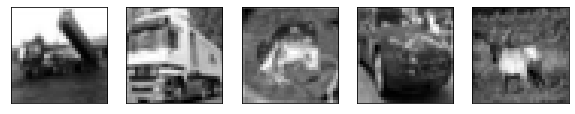

In [406]:
# Evaluo que haya funcionado con las mismas imágenes que antes
plt.subplots(figsize=(10,10))
for i in range(5):
    plt.subplot(1,5,i+1)
    showImg(TensorBN[indRand[i]], color=False)

In [407]:
# Transformo las imagenes de matrices a vectores fila
XTrain = np.zeros((numImg, 32**2))
for i in range(numImg):
    XTrain[i,:] = TensorBN[i,:,:].reshape(1,32**2)

# Agrego el bias a XTrain
XTrain = np.c_[XTrain, np.ones(numImg)]

In [408]:
# Cargo las labels
trainLabels = pd.read_csv('./cifar-10/trainLabels.csv')['label']

# Identifico las labels unicas y las mapeo a un numero
labels = trainLabels.unique()
numLab = len(labels)
maps = np.arange(numLab)
labelMap = dict(zip(labels, maps))
labelMap

{'frog': 0,
 'truck': 1,
 'deer': 2,
 'automobile': 3,
 'bird': 4,
 'horse': 5,
 'ship': 6,
 'cat': 7,
 'dog': 8,
 'airplane': 9}

In [409]:
# Genero las variables dummies para cada label
YTrain = np.zeros((numImg, numLab))
for i in range(numImg):
    lab = trainLabels[i]
    YTrain[i, labelMap[lab]] = 1

## Entrenamiento de la red neuronal

Se clasifico bien el 30.13% de todas las imagenes

Validacion cruzada:
Porcentaje de la clase 0 bien clasificados: 26.58% 
Porcentaje de la clase 1 bien clasificados: 52.2% 
Porcentaje de la clase 2 bien clasificados: 15.84% 
Porcentaje de la clase 3 bien clasificados: 31.8% 
Porcentaje de la clase 4 bien clasificados: 28.06% 
Porcentaje de la clase 5 bien clasificados: 25.54% 
Porcentaje de la clase 6 bien clasificados: 34.64% 
Porcentaje de la clase 7 bien clasificados: 16.5% 
Porcentaje de la clase 8 bien clasificados: 30.28% 
Porcentaje de la clase 9 bien clasificados: 39.86% 


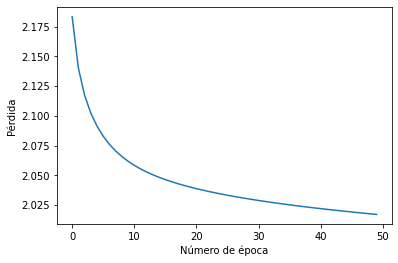

In [410]:
# Entreno el modelo
# W, Loss = redn(XTrain, YTrain[0:numImg], (numLab, 32**2+1), sizeBunch = 1000, numEpoch = 25, step = 3*10**-5, standarize=False)
W, Loss = redn(XTrain, YTrain[0:numImg], (numLab, 32**2+1), sizeBunch = 2500, numEpoch = 50, step = 2.5*10**-5, standarize=False)
graficarPerdida(Loss)

Esta vez el tiempo de procesamiento de la red neuronal (por cada época) tardó mucho más que cuando se entrenó para clasificar dígitos del dataset Semeion. Esto se debe a que el número de imágenes de entrenamiento en este caso es de 50000 mientras que en Semeion era de cerca de 1000. También tardó más que al entrenar la clasificación de dígitos con Mnist, pese a que Mnist tenía ligeramente más instancias de entrenamiento (60000); el motivo de esto es que la resolución de las imágenes con Cifar-10 era mayor (32x32) que el de Mnist (28x28).

Para el entrenamiento de la red se utilizaron batchs de 2500 imágenes, de modo que se generó una partición uniforme de tamaño 20. Se probó usar batchs más pequeños, pero en esos casos la función de pérdida exhibía comportamientos errácticos; por otro lado al usar batchs más grandes el entrenamiento tomaba demasiado tiempo en terminar. Adicionalmente se utilizaron 50 épocas, ya que a partir de ese punto aumentar el número de épocas no tenía un efecto significativo sobre la función de pérdida.

Pese a que se incrementara el número de épocas o se variara los hyperparámetros iniciales del modelo, el porcentaje total de imágenes bien clasificadas fue bajo. El porcentaje no logró subir del 30%, a diferencia de la clasificación de dígitos donde los porcentajes superaban el 90%. Para entender porqué sucedió esto es importante notar dos diferencias sustenciales entre los datasets de Cifar-10 y de Mnist. La primera diferencia es que al transformar las imagenes de Cifar-10 a BN se obtuvieron imágenes con pixeles en todo el rango de grises, mientras que Mnist únicamente contenía imágenes con pixeles blancos o negros (0 o 1). La segunda y más importante diferencia es que Cifar-10 contenía imágenes mucho más complejas de clasificar, como gatos o carros en lugar de dígitos. Ambos factores contribuyeron a que la red no pueda optmizar los pesos más allá de un umbral máximo.

Por último, es importante mencionar que no se pudo probar el desempeño de la red neuronal sobre las imágenes de test ya que el dataset no contenía las labels asociadas a cada imágen.

# Extra: Uso de Tensorflow

In [3]:
import tensorflow as tf

In [412]:
# Arquitectura de la red
layer1 = tf.keras.layers.Dense(units = 10, input_shape=[32**2], activation=tf.nn.softmax)
modelo = tf.keras.Sequential([layer1])

modelo.compile(
    optimizer = 'SGD',
    loss=tf.keras.losses.CategoricalCrossentropy()
)

Se clasifico bien el 29.08% de todas las imagenes

Validacion cruzada:
Porcentaje de la clase 0 bien clasificados: 22.56% 
Porcentaje de la clase 1 bien clasificados: 45.8% 
Porcentaje de la clase 2 bien clasificados: 18.78% 
Porcentaje de la clase 3 bien clasificados: 36.38% 
Porcentaje de la clase 4 bien clasificados: 19.92% 
Porcentaje de la clase 5 bien clasificados: 29.24% 
Porcentaje de la clase 6 bien clasificados: 41.32% 
Porcentaje de la clase 7 bien clasificados: 15.46% 
Porcentaje de la clase 8 bien clasificados: 33.82% 
Porcentaje de la clase 9 bien clasificados: 27.56% 


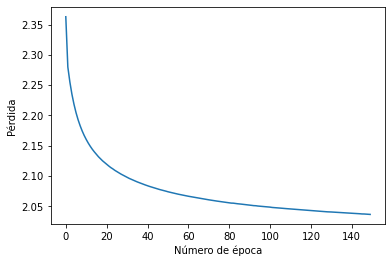

In [413]:
X = XTrain[:,:-1]
Y = YTrain
ajuste = modelo.fit(X,Y,batch_size=2500, epochs=150,verbose=False)
# Predicciones
Yp = modelo.predict(X)
probarClasificacion(Yp, Y)
# Perdida
graficarPerdida(ajuste.history['loss'])

Se repitió el ejercicio 6 haciendo uso de tensorflow y se halló el mismo problema de que el porcentaje de clasificación no superaba el 30%. De hecho, en tensorflow se requirió realizar más épocas para llegar a resultados similares que los del modelo propio. Sin embargo, es importante mencionar que el tiempo de entrenamiento por cada época se redujo considerablemente al usar tensorflow; esto se debe a que la biblioteca está mucho más optimizada que el código propio.